We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [2]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [4]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [5]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

### Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [ ]:
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [ ]:
df

### Reading Data Files

We will use a dataset with restaurant inspection results in NYC which is stored at `/data/restaurants.csv`.

If you do not have it, then uncomment below the lines that start with ! and execute the following:

In [ ]:
# Creates a folder "data" under the current folder
!mkdir -p data
# Removes any prior file if it exists
!rm -f data/restaurant.csv*
# Fetches the most recent dataset and stores it under the folder data
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv
# Compresses the text file, both for saving space and for loading faster
!gzip data/restaurant.csv
# Take a look at the first 3 lines of the file, to ensure that everything worked fine
# !gzip -cd data/restaurant.csv.gz | head -3

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [ ]:
import pandas as pd
restaurants = pd.read_csv("/data/restaurant.csv.gz", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [ ]:
restaurants.head(5)

The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [ ]:
restaurants.describe()

We can also check the data types for each column

In [ ]:
restaurants.dtypes

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [ ]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [ ]:
restaurants.SCORE.describe()

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

In [ ]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

In [ ]:
restaurants["SCORE"].hist(bins=50)

In [ ]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

In [ ]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5) # controls the size of the plot
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

In [ ]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [ ]:
restaurants["GRADE DATE"].head(10)

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [ ]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [ ]:
restaurants.dtypes

In [ ]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

In [ ]:
# your code here

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [ ]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [ ]:
restaurants["DBA"].value_counts()[:10] 

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [ ]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)


In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

In [ ]:
restaurants["VIOLATION CODE"].head(5)

In [ ]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

In [ ]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across boroughs.

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [ ]:
column_list = ["INSPECTION DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ column_list ].head(10)

In [ ]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA"] ].head(5)

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [ ]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

In [ ]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

In [ ]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

In [ ]:
has_mice["CAMIS"].value_counts()[:5]

In [ ]:
condition = (restaurants["CAMIS"] == '41444879')
restaurants[condition]

And we can use more complex conditions. 

In [ ]:
mice_manhattan =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "MANHATTAN") 
                    & (restaurants["ZIPCODE"] == "10012") )

In [ ]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

In [ ]:
has_mice_10012["DBA"].value_counts()[:20]

In [ ]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='bar')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
pivot.plot()

In [ ]:
pivot.head(5)

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [ ]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

And let's plot again.

In [ ]:
pivot.plot()

##### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample('7D').mean()

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
pivot.resample('7D').mean().plot()

In [ ]:
pivot.resample('1M').sum().plot()

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'SCORE', 
    aggfunc = 'mean'
)
pivot2

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis='columns')

In [ ]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean()

In [ ]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot()

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

### Exercise

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collissions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


* Task 1: Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 



* Task 2: Find out the most common contributing factors to the collisions. 
 

   
* Task 3: Break down the number of collisions by borough.





* Task 4: Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

   
* Task 5: Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

 * Task 6: Find the dates with the most accidents. Can you figure out what happened on these days? 



* Task 7: Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


* Task 8: Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

* Task 9: Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

### Bonus plots

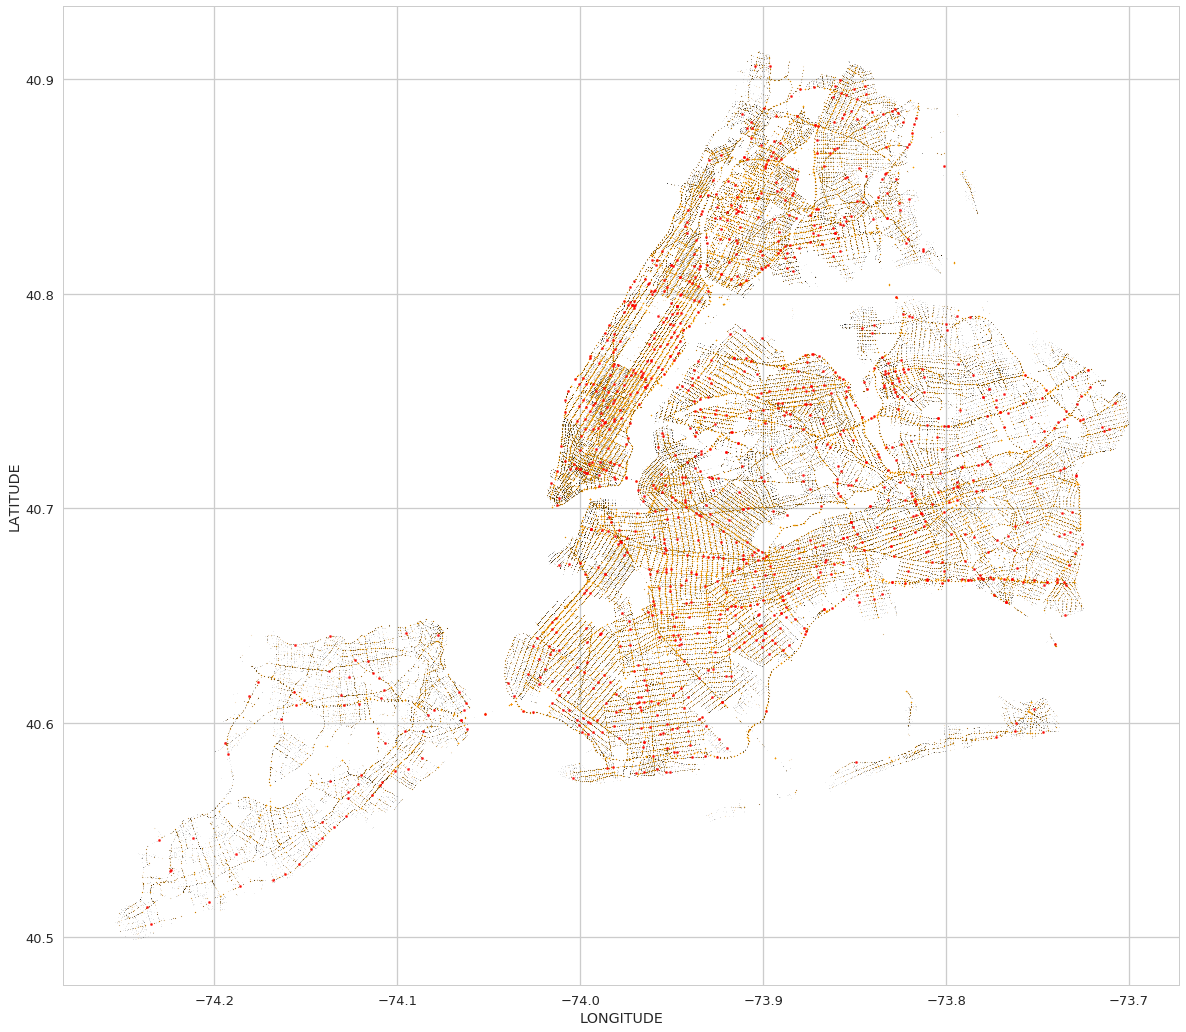

In [6]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

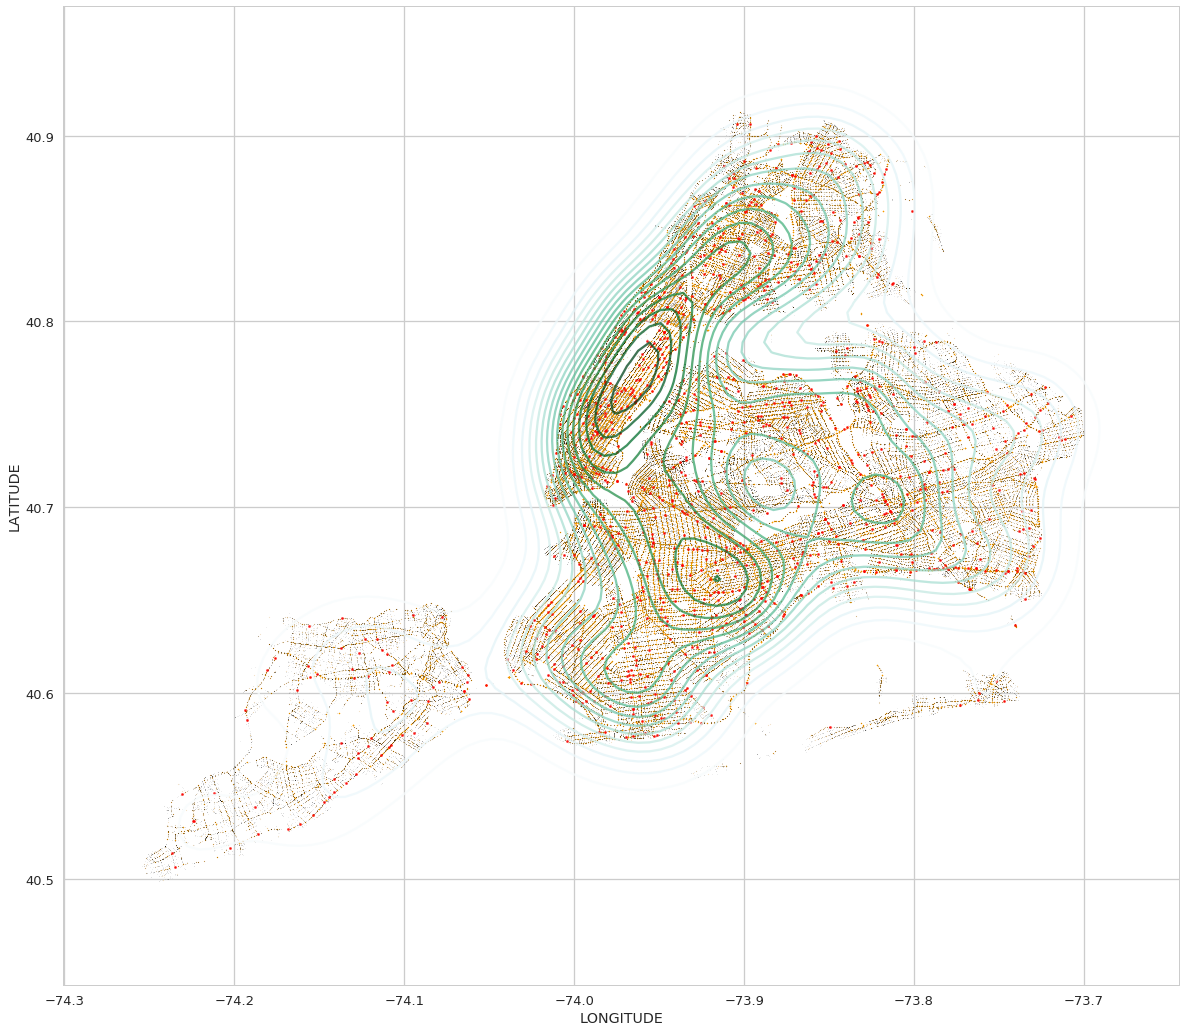

In [7]:
# Same as above, but with a 2-d density estimation for the location of
# accidents that resulted in at least one death

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
killed_plot = cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100,
            cmap=plt.cm.BuGn, shade=False, shade_lowest=True, n_levels=20, alpha=0.75, ax = killed_plot)
